## Задание

## Цель: применить на практике базовые ансамблевые методы

### Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

### Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Подготовьте датасет к обучению моделей.  
    a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.  
    b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).  
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:  
    a) tree.DecisionTreeClassifier  
    b) ensemble.RandomForestClassifier  
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.  
6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.
7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.  
    a) Повторите п. 5
8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.  
    a) Повторите п. 5
9. Сформулируйте выводы по проделанной работе.  
    a) Сравните метрики построенных моделей.
    b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

**Результат:** получены знания по использованию базовых ансамблевых методов.


**Форма выполнения:**
- ссылка на Jupyter Notebook, загруженный на GitHub
- ссылка на Google Colab
- файл с расширением .ipynb

**Инструменты:**
- Jupyter Notebook/Google Colab;
- GitHub.
- данные с сайта
- pd.get_dummies, preprocessing.LabelEncoder
- модели tree.DecisionTreeClassifier и ensemble.RandomForestClassifier
- metrics.classification_report
- ensemble.BaggingClassifier
- svm.LinearSVC
- ensemble.StackingClassifier


**Срок выполнения:** дедлайн приема решений на проверку

**Рекомендации к выполнению:**
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [13]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 2. Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.  
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [3]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [5]:
data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [6]:
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [7]:
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [8]:
data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [15]:
categorical_features = ['ChestPainType', 'RestingECG',  'ST_Slope']
binary_features = ['Sex', 'ExerciseAngina']

data = pd.get_dummies(data, columns=categorical_features) 
data = pd.get_dummies(data, columns=binary_features, drop_first=True) # для бинарных признаков drop_first=True чтобы удалить один из столбов


data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_M,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,0,1,0,0,0
2,37,130,283,0,98,0.0,0,0,1,0,0,0,0,1,0,0,1,1,0
3,48,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,0,1,0,0,1,0,0,0,1,1,0


### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [16]:
x = data.drop(columns='HeartDisease')
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_M,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,1,0,0,0,1,0,0,0,1,1,0
1,49,160,180,0,156,1.0,0,0,1,0,0,1,0,0,1,0,0,0
2,37,130,283,0,98,0.0,0,1,0,0,0,0,1,0,0,1,1,0
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,0,1,1,0


In [17]:
y = data['HeartDisease']

y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier


In [26]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
decision_tree_pred_y = decision_tree.predict(x_test)

b) ensemble.RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_features = 5)

forest.fit(x_train, y_train)



RandomForestClassifier(max_features=5)

In [28]:
forest_pred_y = forest.predict(x_test)

### 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [29]:
from sklearn.metrics import classification_report


In [31]:
print(classification_report(y_test, decision_tree_pred_y))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



In [32]:
print(classification_report(y_test, forest_pred_y))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        77
           1       0.93      0.87      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [33]:
from sklearn.metrics import f1_score

print(f1_score(y_test, decision_tree_pred_y))

0.8275862068965517


In [35]:
print(f1_score(y_test, forest_pred_y))

0.8985507246376813


### 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [37]:

imp = pd.Series(forest.feature_importances_)

In [39]:
imp.index = pd.Series(x_train.columns)

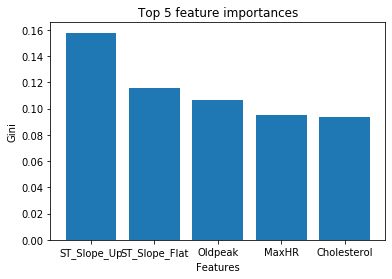

In [44]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

### 7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
a) Повторите п. 5

In [59]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(RandomForestClassifier(), max_samples=0.5, max_features=0.5)

In [60]:
bagging.fit(x_train, y_train)


BaggingClassifier(base_estimator=RandomForestClassifier(), max_features=0.5,
                  max_samples=0.5)

In [61]:
bagging_pred_y = bagging.predict(x_test)

In [62]:
print(classification_report(y_test, bagging_pred_y))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [64]:
f1_score(y_test, bagging_pred_y)

0.8826291079812206

### 8.Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
a) Повторите п. 5


In [72]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier

In [100]:
stacking = StackingClassifier(
    [
        ('DecisionTree', DecisionTreeClassifier()),
        ('RandomForest', RandomForestClassifier()),
        ('LinearSVC', LinearSVC(max_iter=5000, C=0.8))
    ], RidgeClassifier())

In [101]:
stacking.fit(x_train, y_train)

/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/Dmitry/opt/anaconda3/lib/python3.7/site-pac

StackingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                               ('RandomForest', RandomForestClassifier()),
                               ('LinearSVC', LinearSVC(C=0.8, max_iter=5000))],
                   final_estimator=RidgeClassifier())

In [102]:
print(f'Score on train data {stacking.score(x_train, y_train)}')
print(f'Score on test data {stacking.score(x_test, y_test)}')

for i in stacking.named_estimators:
    print(f'Score on train data with model {i} {stacking.named_estimators_[i].score(x_train, y_train)}')
    print(f'Score on test data with model {i} {stacking.named_estimators_[i].score(x_test, y_test)}')

Score on train data 1.0
Score on test data 0.8804347826086957
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7934782608695652
Score on train data with model RandomForest 1.0
Score on test data with model RandomForest 0.8858695652173914
Score on train data with model LinearSVC 0.8583106267029973
Score on test data with model LinearSVC 0.875


In [103]:
stacking_pred_y = stacking.predict(x_test)

### 9. Сформулируйте выводы по проделанной работе.


In [107]:
print(f'F1 score on test data with Decision Tree {f1_score(y_test, decision_tree_pred_y)}')
print(f'F1 score on test data with Random Forest {f1_score(y_test, forest_pred_y)}')
print(f'F1 score on test data with Bagging {f1_score(y_test, bagging_pred_y)}')
print(f'F1 score on test data with Stacking {f1_score(y_test, stacking_pred_y)}')


F1 score on test data with Decision Tree 0.8275862068965517
F1 score on test data with Random Forest 0.8985507246376813
F1 score on test data with Bagging 0.8826291079812206
F1 score on test data with Stacking 0.8962264150943396


По результатам можно увидеть, что дерево решений ожидаемо показло релуьтат хуже чем ансамбельные модели.
Среди ансамблей Случайный лес и Стеккинг показали самый лучший результат. Думаю результаты можно улучшить еще лучше если оптимизировать гиперпараметры